<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/rabbits_owls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to compute trajectory using matrix powers
def compute_trajectory_matrix_power(A, v0, timesteps):
    populations = [v0]
    for t in range(1, timesteps + 1):
        vt = np.linalg.matrix_power(A, t) @ v0
        populations.append(vt)
    return [p[0, 0] for p in populations], [p[1, 0] for p in populations]

In [3]:
# Function to compute trajectory using eigenvalue decomposition
def compute_trajectory_eigendecomp(A, v0, timesteps):
    eigvals, eigvecs = np.linalg.eig(A)
    D = np.diag(eigvals)
    P = eigvecs
    P_inv = np.linalg.inv(P)

    populations = [v0]
    for t in range(1, timesteps + 1):
        D_power = np.diag(eigvals ** t)
        A_power = P @ D_power @ P_inv
        vt = A_power @ v0
        populations.append(vt)
    return [p[0, 0].real for p in populations], [p[1, 0].real for p in populations]


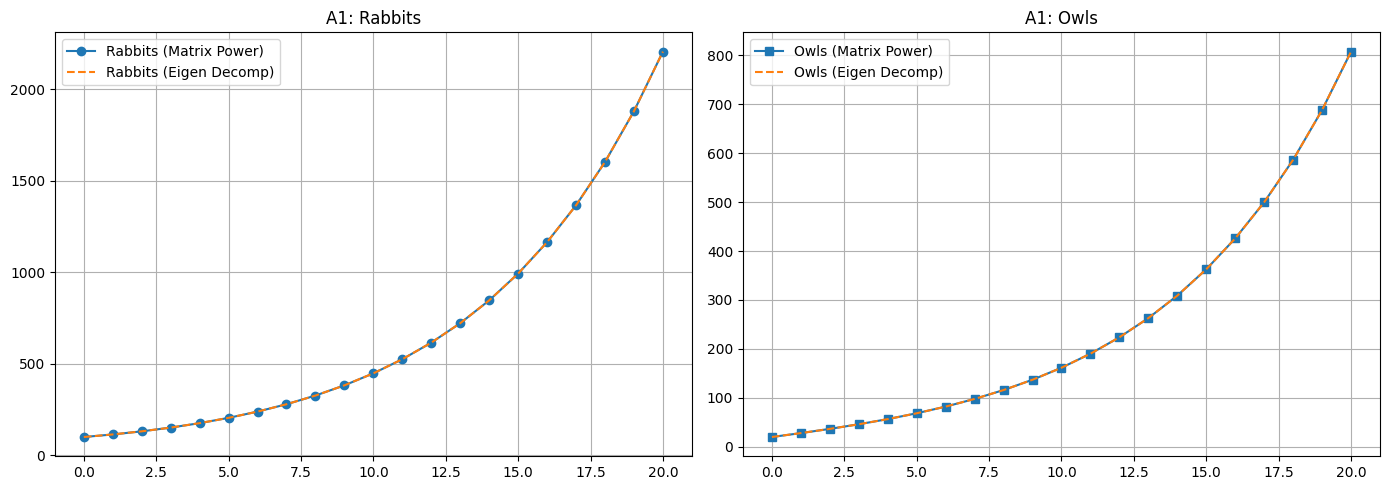

In [11]:
# Initial population vector
v0 = np.array([[100], [20]])
timesteps = 20

# Define matrices
A1 = np.array([[1.1, 0.2],
               [0.1, 0.9]])


# Compute for A1
rabbits1_direct, owls1_direct = compute_trajectory_matrix_power(A1, v0, timesteps)
rabbits1_eig, owls1_eig = compute_trajectory_eigendecomp(A1, v0, timesteps)


# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- A1 (real eigenvalues) ---
axs[0].plot(rabbits1_direct, label="Rabbits (Matrix Power)", marker='o')
axs[0].plot(rabbits1_eig, label="Rabbits (Eigen Decomp)", linestyle='--')
axs[0].set_title("A1: Rabbits")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(owls1_direct, label="Owls (Matrix Power)", marker='s')
axs[1].plot(owls1_eig, label="Owls (Eigen Decomp)", linestyle='--')
axs[1].set_title("A1: Owls")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

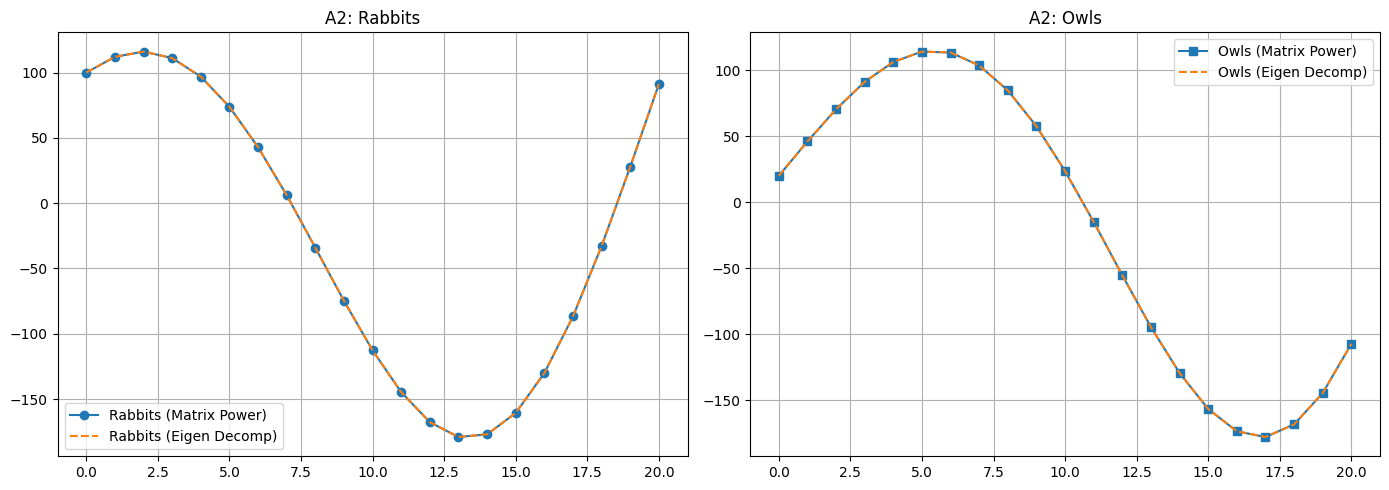

In [14]:

# Initial population vector
v0 = np.array([[100], [20]])
timesteps = 20

# Define matrices
A2 = np.array([[1.2, -0.4],
               [0.3,  0.8]])


# Compute for A2
rabbits2_direct, owls2_direct = compute_trajectory_matrix_power(A2, v0, timesteps)
rabbits2_eig, owls2_eig = compute_trajectory_eigendecomp(A2, v0, timesteps)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- A2 (complex eigenvalues) ---
axs[0].plot(rabbits2_direct, label="Rabbits (Matrix Power)", marker='o')
axs[0].plot(rabbits2_eig, label="Rabbits (Eigen Decomp)", linestyle='--')
axs[0].set_title("A2: Rabbits")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(owls2_direct, label="Owls (Matrix Power)", marker='s')
axs[1].plot(owls2_eig, label="Owls (Eigen Decomp)", linestyle='--')
axs[1].set_title("A2: Owls")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()
